In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [27]:
#Dataframes
#Consumption dataframe
df_consumo = pd.read_csv(r"consumo_energia.csv")
df_consumo['date'] = pd.to_datetime(df_consumo['din_instante'])
df_consumo.set_index('date', inplace=True)
df_consumo.sort_index(inplace=True)
df_consumo.drop(['id_subsistema'],axis=1)

#Generation dataframe
df_geracao = pd.read_csv(r"geracao_energia.csv")
# df_geracao.boxplot()
df_geracao['date'] = pd.to_datetime(df_geracao['index'])
df_geracao.set_index('date', inplace=True)
df_geracao['month'] = df_geracao.index.month
df_geracao['weekday'] = df_geracao.index.weekday
df_geracao.sort_index(inplace=True)
merged_df = pd.merge(df_geracao, df_consumo, on='date')


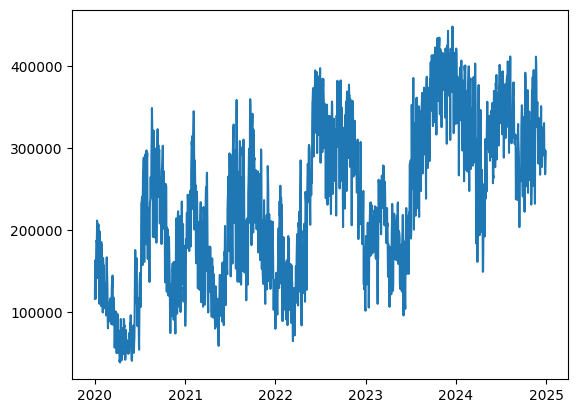

In [31]:
plt.plot(merged_df['val_geracao'])
plt.show()

C:\Users\mateu\AppData\Local\Temp\ipykernel_22144\1752612864.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


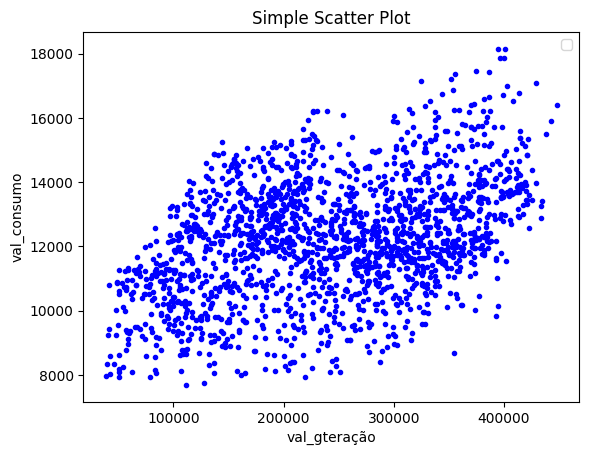

In [30]:
plt.scatter(merged_df['val_geracao'],merged_df['val_cargaenergiamwmed'], color='blue', marker='.')
plt.xlabel('val_gteração')
plt.ylabel('val_consumo')
plt.title('Simple Scatter Plot')
plt.legend()
plt.show()

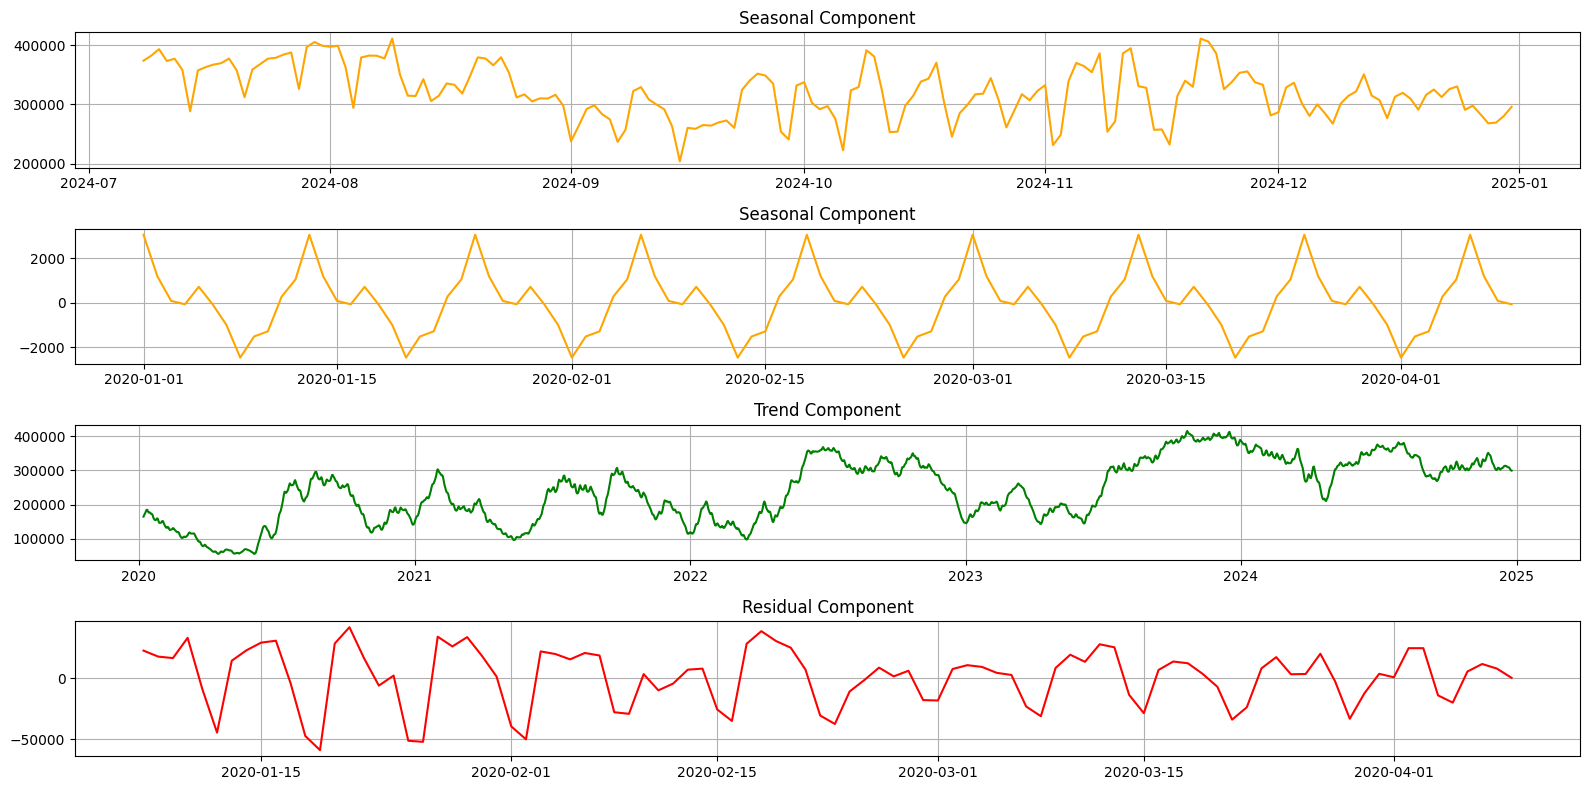

In [23]:
#Extracting components from the series
result = seasonal_decompose(merged_df['val_geracao'], model='additive', period=12)

seasonal = merged_df['seasonal'] = result.seasonal
trend = merged_df['seasonal'] = result.trend
residual = merged_df['seasonal'] = result.resid

plt.figure(figsize=(16, 8))

plt.subplot(4, 1, 1)
plt.plot(merged_df['val_geracao'][1650:], label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(seasonal[:100], label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(residual[:100], label='Residual', color='red')
plt.title('Residual Component')
plt.grid(True)

plt.tight_layout()
plt.show()

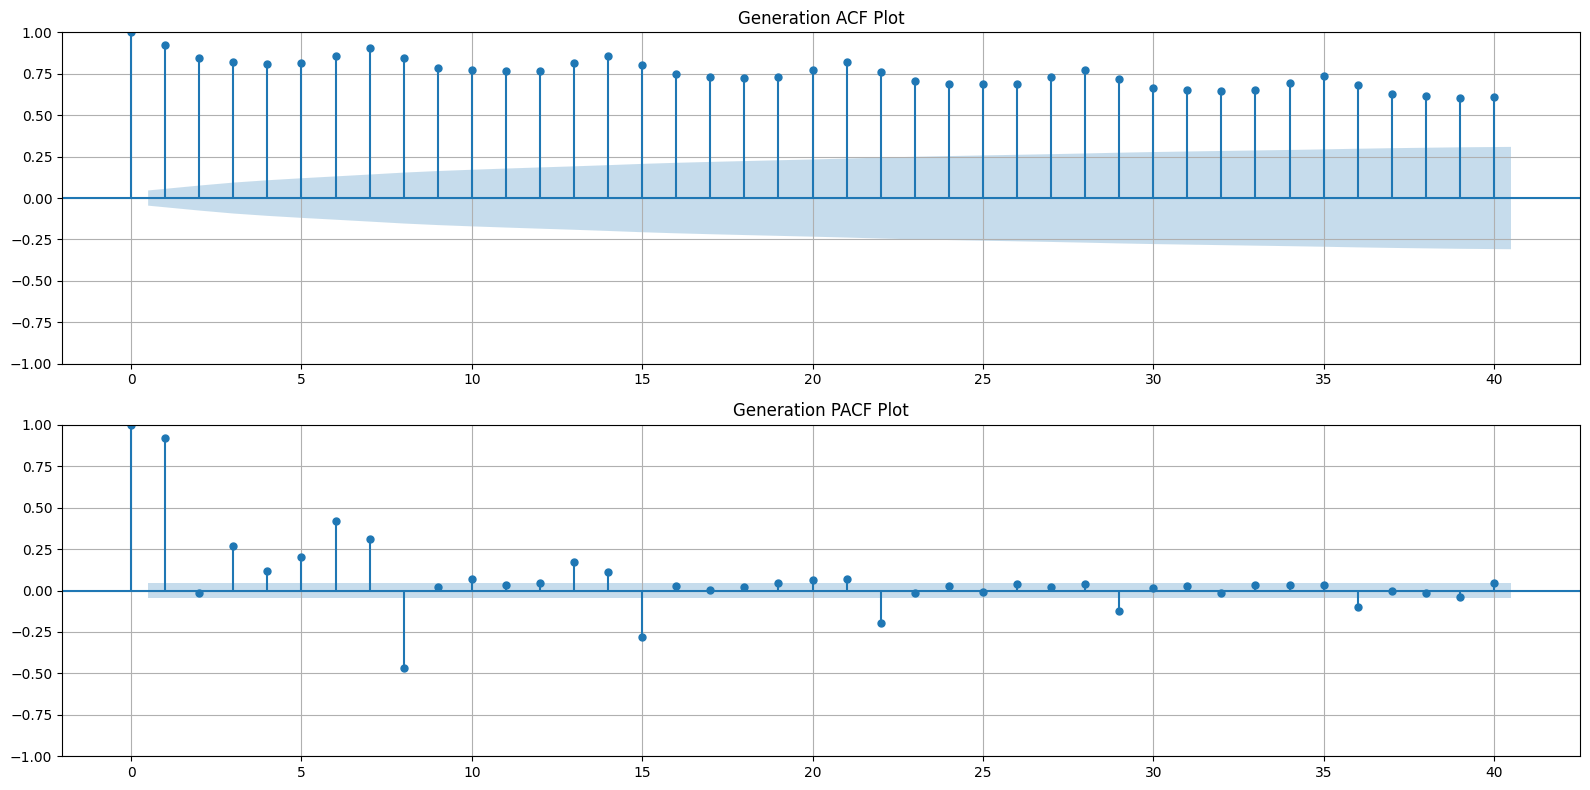

In [24]:
#Generation and Consumptionm ACF and PACF
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
plot_acf(df_geracao['val_geracao'], lags=40, ax=plt.gca())
plt.title('Generation ACF Plot')
plt.grid(True)

plt.subplot(2, 1, 2)
plot_pacf(df_geracao['val_geracao'], lags=40, method='ywm', ax=plt.gca())
plt.title('Generation PACF Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
#Estacionariedade
result = adfuller(merged_df['val_geracao'])  # substitua 'target' pelo nome da sua série
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
    
if result[1] < 0.05:
    print("Série é estacionária (rejeita H0)")
else:
    print("Série NÃO é estacionária (falha em rejeitar H0)")

ADF Statistic: -2.6553282238530875
p-value: 0.08209252001229955
Critical Value (1%): -3.434
Critical Value (5%): -2.863
Critical Value (10%): -2.568
Série NÃO é estacionária (falha em rejeitar H0)
